In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw
import seaborn as sns 
import pandas as pd
import sys
sns.set_style('ticks')

In [2]:
sys.path.append('..')

In [3]:
def cases(beta,gamma,eps,I0):
    R0 = beta/gamma 
    alpha = (1/R0) + eps + I0
    beta2 = np.log((1/R0) + eps)
    gamma = R0
    C = (1/gamma)*(lambertw(-gamma*np.exp(beta2 - alpha*gamma)) + (alpha*gamma))
    return np.real(C)

# Example - First simulations $\epsilon = 0.03$

In [4]:
fsize_eps1 = []
std_fsize_eps1 = []
ftime_eps1 = []
std_ftime_eps1 = []

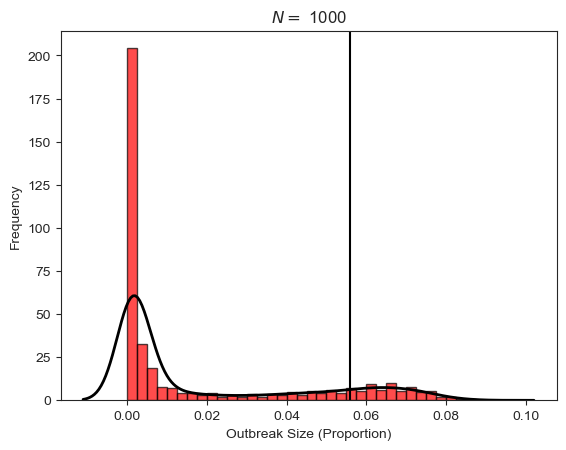

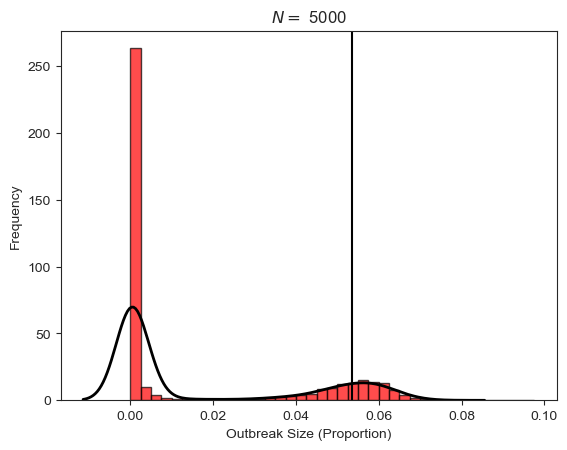

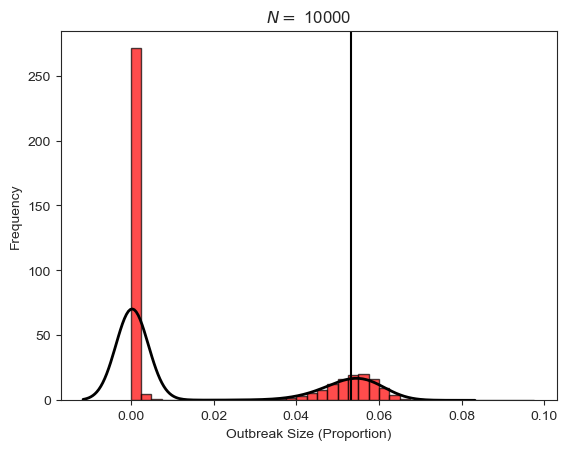

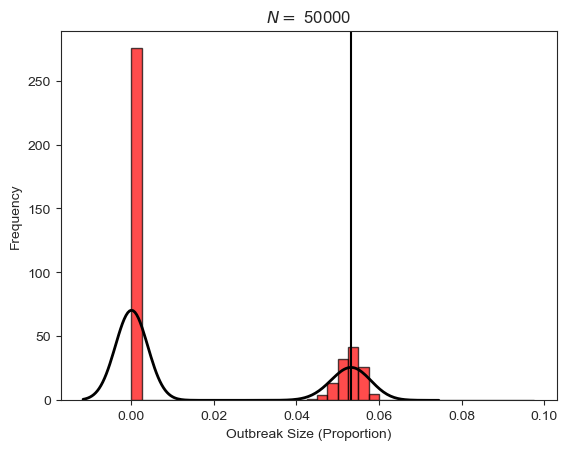

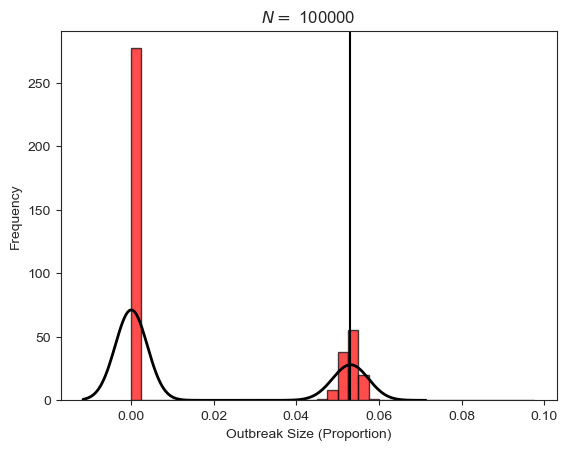

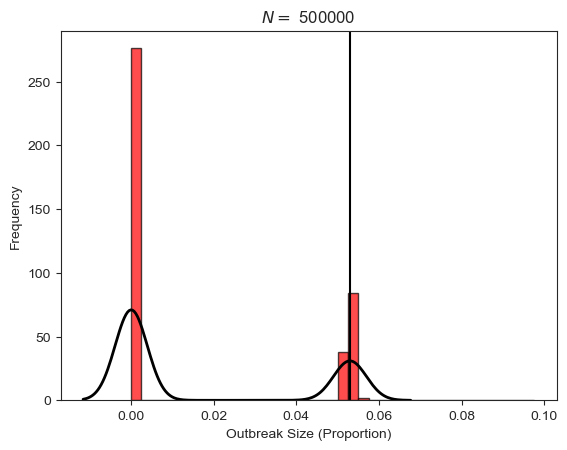

In [5]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for i in range(len(N_vec)):
    fsize_eps1.append(np.mean(df[i]/N_vec[i]))
    std_fsize_eps1.append(np.std(df[i]/N_vec[i]))
    plt.title(r'$N =$ '+str(N_vec[i]))
    bins_vec = np.arange(0,0.1,0.0025)
    sns.kdeplot(np.array(df[i])/N_vec[i], color = 'black', linewidth = 2)
    plt.hist(np.array(df[i])/N_vec[i], bins = bins_vec, edgecolor = 'black', color = 'red', density = True, alpha = 0.7)
    #sns.displot(np.array(df[i])/N_vec[i], bins = 100)
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.axvline(cases(3,0.2,0.03,1/N_vec[i]), color = 'k', label = 'deterministic')
    plt.show()

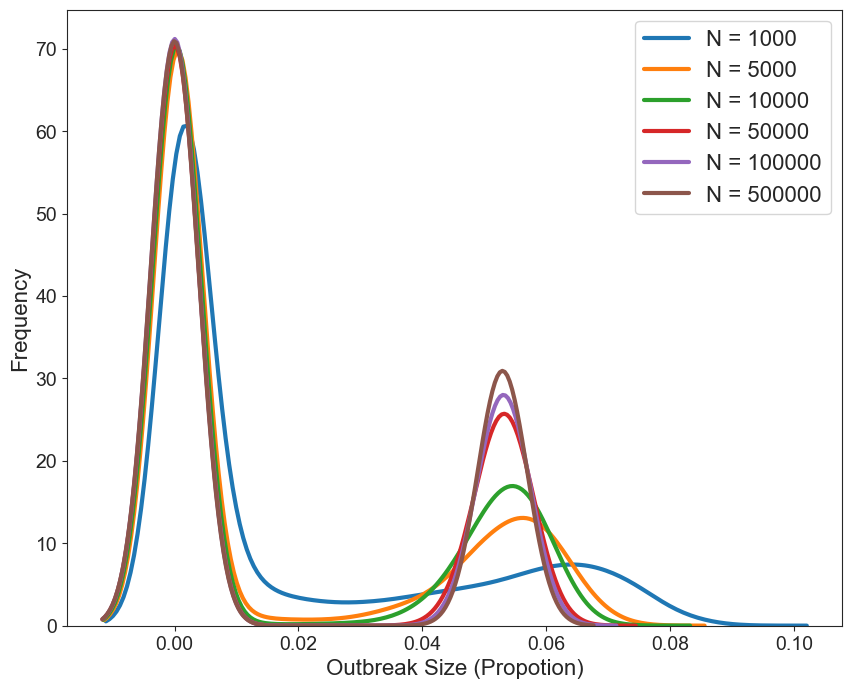

In [6]:
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
fig = plt.figure(figsize = (10,8))
for i in range(len(N_vec)):
    fsize_eps1.append(np.mean(df[i]/N_vec[i]))
    std_fsize_eps1.append(np.std(df[i]/N_vec[i]))
    bins_vec = np.arange(0,0.1,0.0025)
    sns.kdeplot(np.array(df[i])/N_vec[i], linewidth = 3, label = 'N = '+str(N_vec[i]))
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Outbreak Size (Propotion)', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Loading files of simulatios

In [7]:
files = ['measles/measles_-0.05/GTP_fsize_inf_2e-06_-0.05_500000.csv',
        'measles/measles_-0.03/GTP_fsize_inf_2e-06_-0.03_500000.csv',
        'measles/measles_-0.01/GTP_fsize_inf_2e-06_-0.01_500000.csv',
        'measles/measles_0/GTP_fsize_inf_2e-06_0_500000.csv',
        'measles/measles_0.01/GTP_fsize_inf_2e-06_0.01_500000.csv',
        'measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv',
        'measles/measles_0.05/GTP_fsize_inf_2e-06_0.05_500000.csv',
        'measles/measles_0.1/GTP_fsize_inf_2e-06_0.1_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
eps_vec = [-0.05,-0.03,-0.01,0,0.01,0.03,0.05,0.1]

# Different $\epsilon$ values separately, same $N$

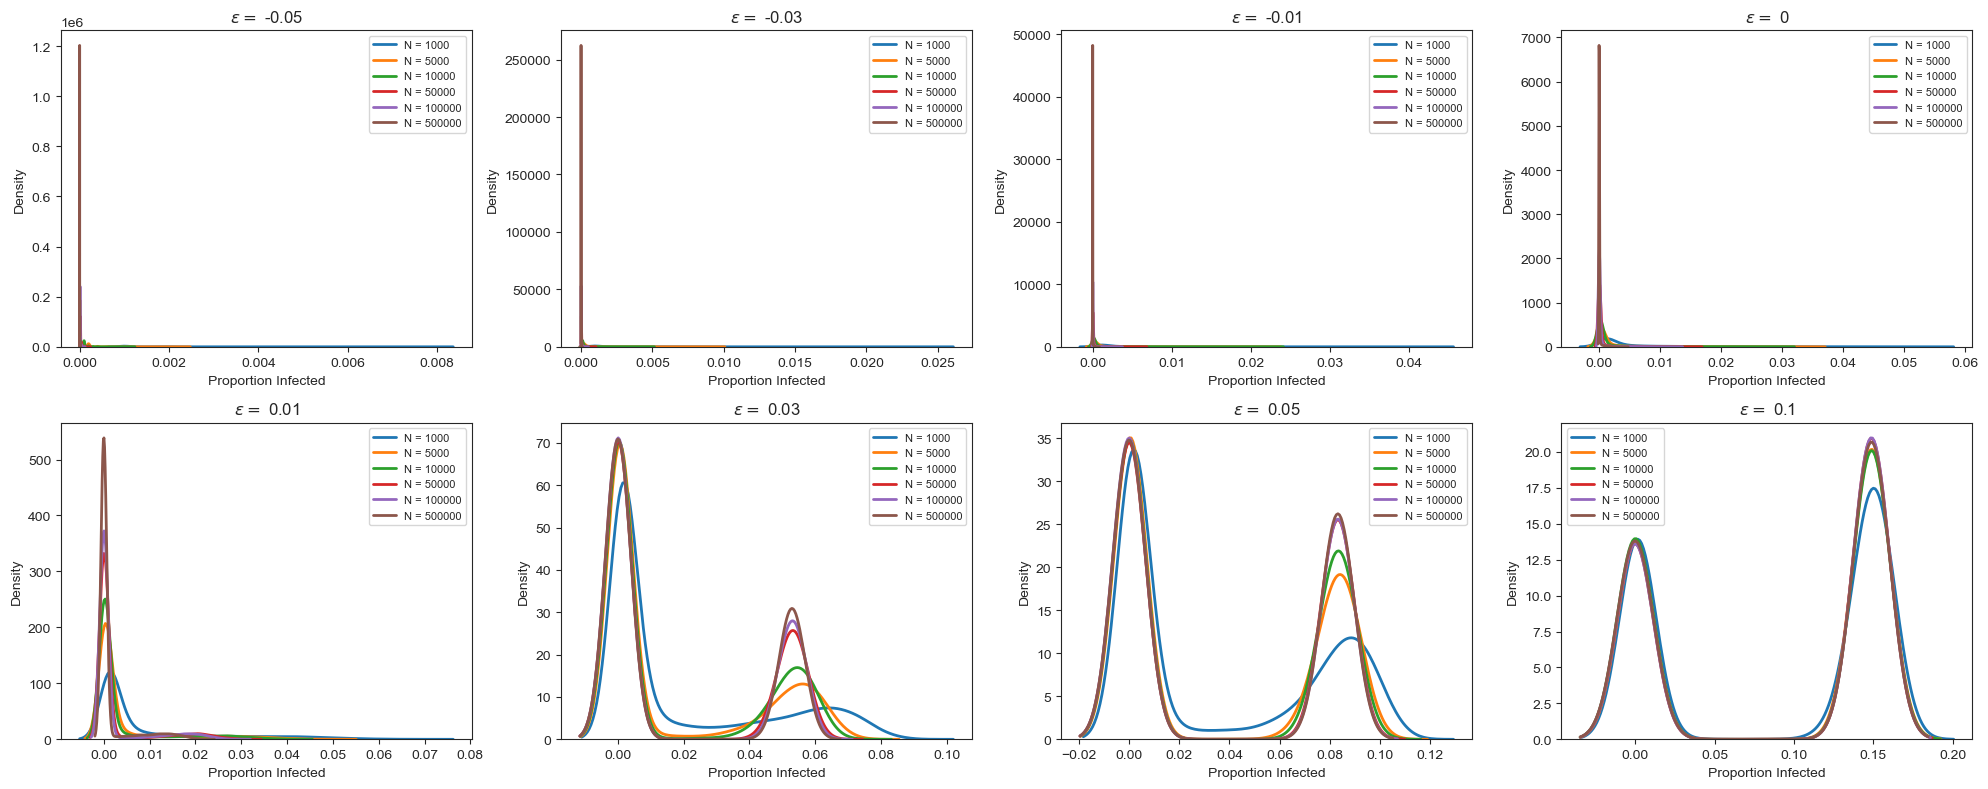

In [8]:
fig, axs = plt.subplots(2, 4, figsize = (20,8))
c = 0
for i in range(2):
    for j in range(4):
        df = np.loadtxt(files[c])
        for k in range(len(N_vec)):
            sns.kdeplot(np.array(df[k])/N_vec[k], linewidth = 2, label = 'N = '+str(N_vec[k]),ax=axs[i,j])
        axs[i,j].legend(fontsize = 8)
        axs[i,j].set_xlabel('Proportion Infected')
        axs[i,j].set_title(r'$\epsilon = $ '+str(eps_vec[c]))
        c = c + 1
fig.tight_layout()
plt.savefig('plot_different_eps.pdf')
plt.show()

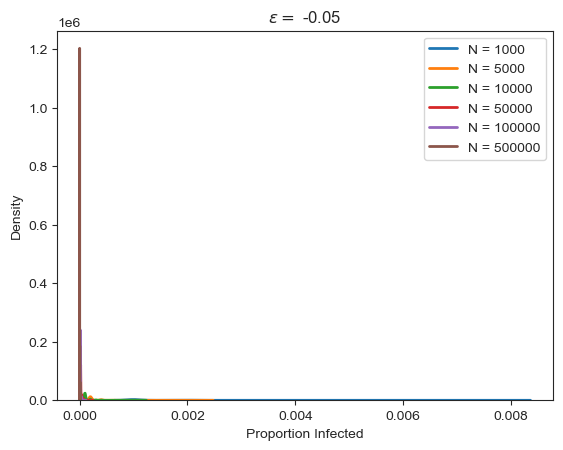

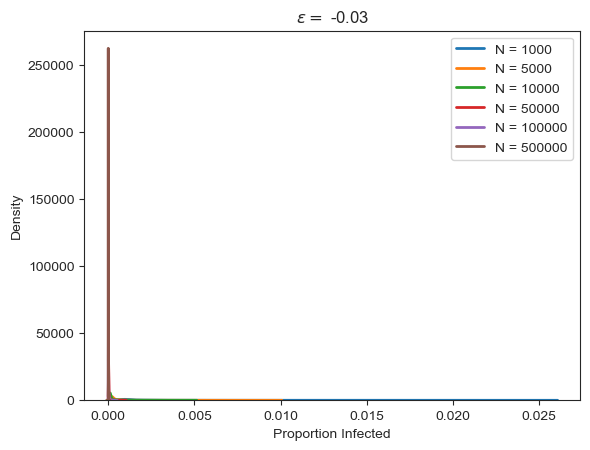

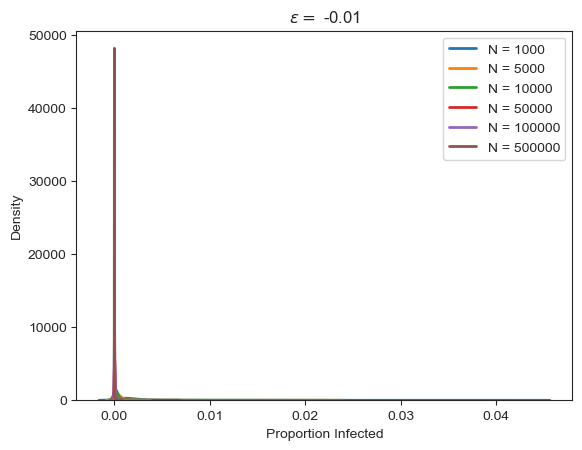

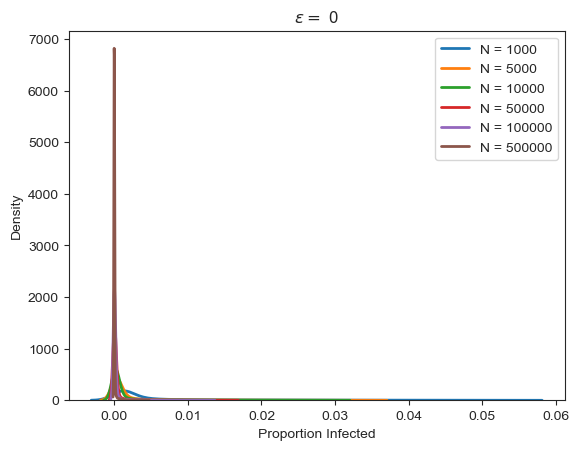

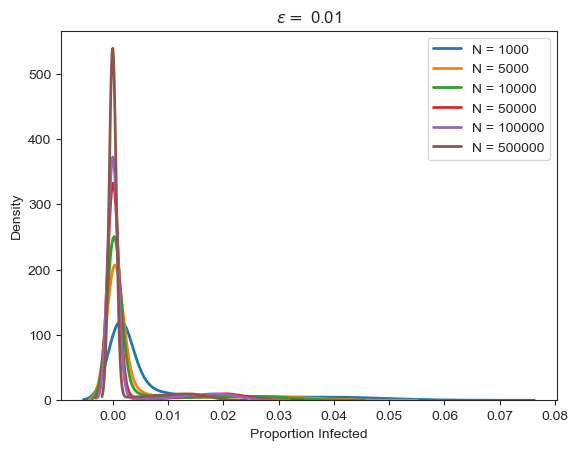

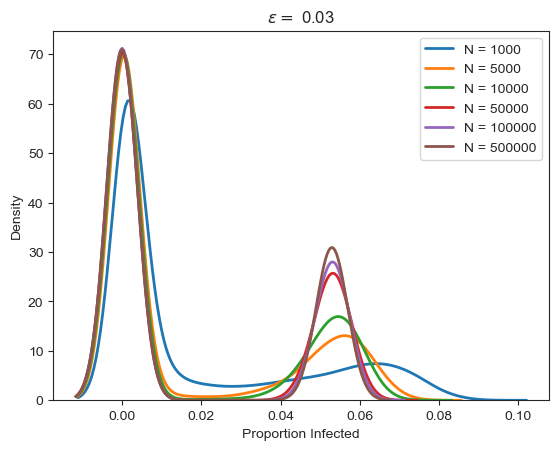

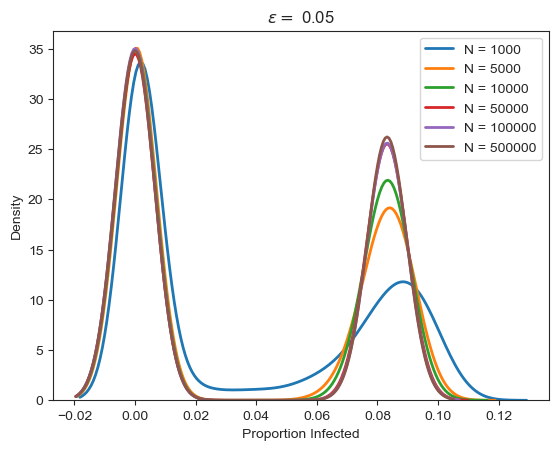

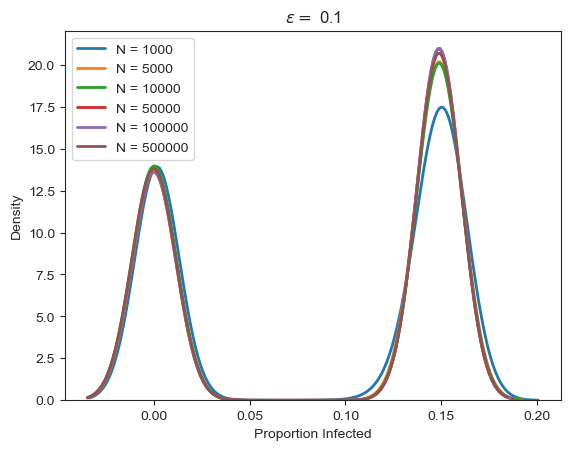

In [9]:
fsize_eps = []
std_fsize_eps = []
c = 0
for i in range(2):
    for j in range(4):
        df = np.loadtxt(files[c])
        for k in range(len(N_vec)):
            fsize_eps.append(np.mean(np.array(df[k])/N_vec[k]))
            std_fsize_eps.append(np.std(np.array(df[k])/N_vec[k]))
            sns.kdeplot(np.array(df[k])/N_vec[k], linewidth = 2, label = 'N = '+str(N_vec[k]))
        plt.legend()
        plt.xlabel('Proportion Infected')
        plt.title(r'$\epsilon = $ '+str(eps_vec[c]))
        c = c + 1
        plt.show()

# Plotting mean outbreak size as function of epsilon 

In [10]:
fsize_eps = np.array(fsize_eps)
fsize_eps = fsize_eps.reshape((8,6))
std_fsize_eps = np.array(std_fsize_eps)
std_fsize_eps = std_fsize_eps.reshape((8,6))

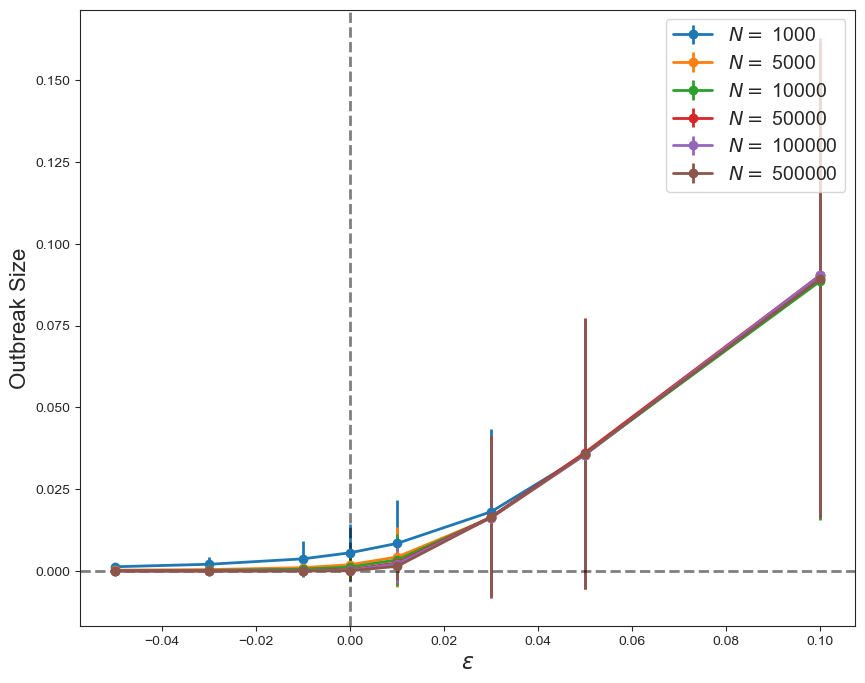

In [11]:
fig = plt.subplots(figsize = (10,8))
for i in range(6):
    plt.errorbar(eps_vec,fsize_eps.T[i,:], std_fsize_eps.T[i,:], label = r'$N = $ '+str(N_vec[i]), lw = 2, marker = 'o')
plt.legend(fontsize = 14)
plt.xlabel(r'$\epsilon$',fontsize = 16)
plt.ylabel('Outbreak Size', fontsize = 16)
plt.axhline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.axvline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.show()

# Plotting for different $\epsilon$ as function of $N$

In [12]:
fsize_eps

array([[1.31110000e-03, 2.64880000e-04, 1.32600000e-04, 2.65380000e-05,
        1.32710000e-05, 2.65540000e-06],
       [2.06740000e-03, 4.41460000e-04, 2.22390000e-04, 4.48980000e-05,
        2.24760000e-05, 4.49860000e-06],
       [3.72900000e-03, 1.03798000e-03, 5.62570000e-04, 1.27584000e-04,
        6.53080000e-05, 1.33438000e-05],
       [5.58800000e-03, 1.92572000e-03, 1.23065000e-03, 4.26848000e-04,
        2.60384000e-04, 7.18328000e-05],
       [8.44920000e-03, 4.30004000e-03, 3.40298000e-03, 2.49962800e-03,
        2.17775300e-03, 1.42939660e-03],
       [1.81211000e-02, 1.62560600e-02, 1.64245200e-02, 1.65761900e-02,
        1.63231030e-02, 1.64094852e-02],
       [3.56024000e-02, 3.55749400e-02, 3.58166900e-02, 3.62116460e-02,
        3.55690840e-02, 3.58193176e-02],
       [8.93094000e-02, 9.01086800e-02, 8.85593200e-02, 9.03560220e-02,
        9.03719460e-02, 8.92331096e-02]])

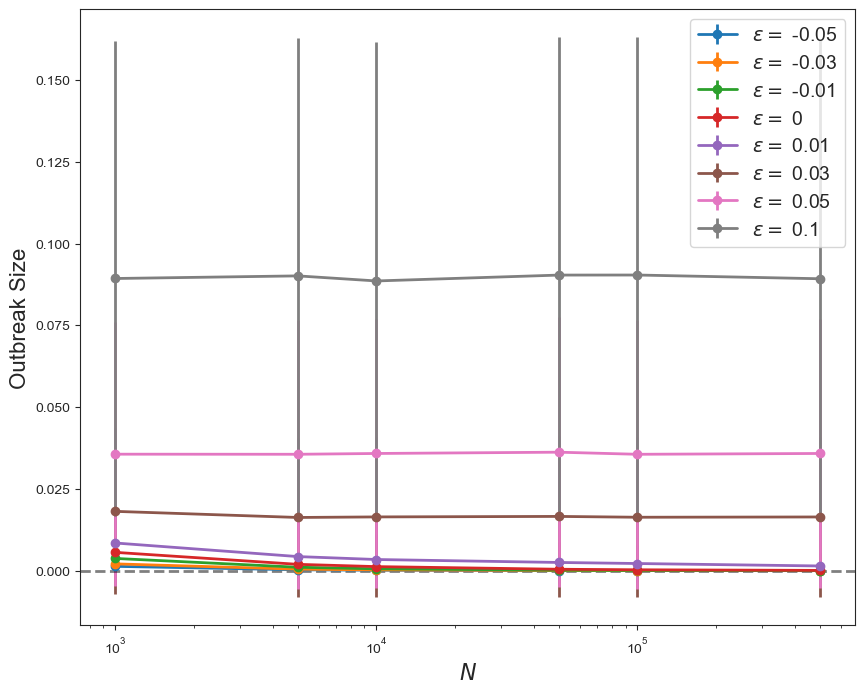

In [13]:
fig = plt.subplots(figsize = (10,8))
for i in range(8):
    plt.errorbar(N_vec, fsize_eps[i,:], std_fsize_eps[i,:], label = r'$\epsilon = $ '+str(eps_vec[i]), lw = 2, marker = 'o')
plt.legend(fontsize = 14)
plt.xlabel(r'$N$',fontsize = 16)
plt.ylabel('Outbreak Size', fontsize = 16)
plt.xscale('log')
plt.axhline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.axvline(0, linewidth = 2, alpha = 0.5, color = 'k', linestyle = '--')
plt.show()